<a href="https://colab.research.google.com/github/ranjithsrajan/PyLab/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IITM and TalentSprint
### Assignment (Optional): Hierarchical Clustering

# Learning Objectives

### Understand the concept of Hierarchical Clustering and how it groups countries based on socio-economic indicators.

### Learn how to use Gapminder data (GDP, life expectancy, population) for real-world clustering tasks.

### Apply preprocessing (scaling) and visualize clusters with dendrograms.

### Use PCA to reduce dimensions and plot high-dimensional clusters in 2D while retaining most variance.

### Interpret cluster profiles to identify patterns such as developed, developing, and low-income nations.

# Import Libraries

In [1]:
# We import necessary libraries for:
# - Data handling (pandas, numpy)
# - Visualization (matplotlib, seaborn)
# - Clustering (sklearn)
# - Dimensionality reduction (PCA)
# - Hierarchical dendrogram plotting (scipy)
# - Dataset (plotly.express for Gapminder)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

import plotly.express as px


# Load the Dataset

In [2]:
# Gapminder dataset contains life expectancy, GDP per capita, and population
# for many countries across years.
# We filter the dataset to only the year 2007 to cluster countries
# based on their socio-economic indicators.

gapminder = px.data.gapminder()
df = gapminder[gapminder['year'] == 2007][['country','gdpPercap','lifeExp','pop']]

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (142, 4)


,country,gdpPercap,lifeExp,pop
11,Afghanistan,974.580338,43.828,31889923
23,Albania,5937.029526,76.423,3600523
35,Algeria,6223.367465,72.301,33333216
47,Angola,4797.231267,42.731,12420476
59,Argentina,12779.379640,75.320,40301927


# Split Data into Train and Test

In [3]:
# Clustering is unsupervised, so splitting is optional.
# But here we show how to ensure preprocessing is consistent.
# - X contains numeric features (GDP, life expectancy, population)
# - countries is used later for labeling

X = df.drop('country', axis=1)
countries = df['country']

X_train, X_test, countries_train, countries_test = train_test_split(
    X, countries, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (113, 3)
Test data shape: (29, 3)


# Preprocessing with StandardScaler

In [4]:
# Hierarchical clustering is distance-based (Euclidean distance).
# Features like population and GDP have very different scales.
# StandardScaler transforms features to have mean=0 and variance=1,
# so no single feature dominates.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Dendrogram

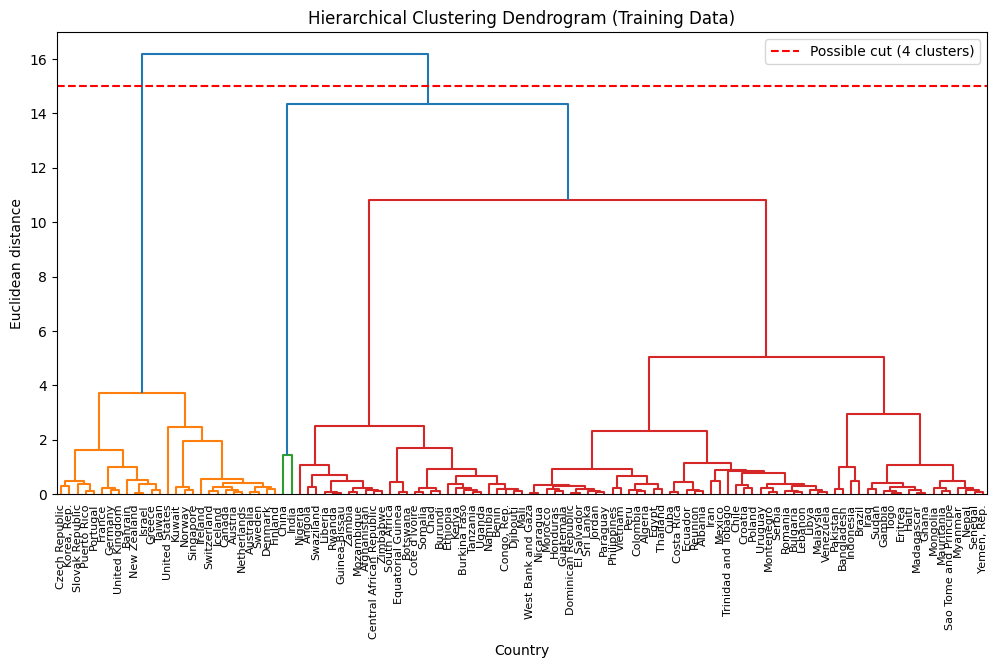

In [5]:
# A dendrogram is a tree diagram showing the hierarchical merging
# of clusters. We use 'ward' linkage (minimizes variance).
# By inspecting the dendrogram, we can decide how many clusters to cut.

plt.figure(figsize=(12, 6))
Z = linkage(X_train_scaled, method='ward')
dendrogram(Z, labels=countries_train.values, leaf_rotation=90, leaf_font_size=8)
plt.axhline(y=15, color='r', linestyle='--', label="Possible cut (4 clusters)")
plt.legend()
plt.title("Hierarchical Clustering Dendrogram (Training Data)")
plt.xlabel("Country")
plt.ylabel("Euclidean distance")
plt.show()

# Train Agglomerative Clustering Model

In [6]:
# Agglomerative clustering starts with each country as its own cluster
# and iteratively merges the two closest clusters until the desired number remains.
# We set n_clusters=4 based on dendrogram inspection.

model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clusters_train = model.fit_predict(X_train_scaled)

# Add results to DataFrame
train_results = pd.DataFrame(X_train, columns=X_train.columns)
train_results['Country'] = countries_train.values
train_results['Cluster'] = clusters_train

print("\nSample clustered countries (train):")
train_results.head()


Sample clustered countries (train):


,gdpPercap,lifeExp,pop,Country,Cluster
1487,37506.419070,81.701,7554661,Switzerland,1
383,14619.222720,75.748,4493312,Croatia,0
1175,2605.947580,65.483,169270617,Pakistan,0
443,6025.374752,72.235,9319622,Dominican Republic,0
203,1217.032994,52.295,14326203,Burkina Faso,3


# Apply to Test Data

In [7]:
# Note: AgglomerativeClustering has no .predict() method.
# For test data, we fit a new model with the same settings.
# This is a limitation of hierarchical clustering in sklearn.

model_test = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clusters_test = model_test.fit_predict(X_test_scaled)

test_results = pd.DataFrame(X_test, columns=X_test.columns)
test_results['Country'] = countries_test.values
test_results['Cluster'] = clusters_test

print("\nSample clustered countries (test):")
test_results.head()


Sample clustered countries (test):


,gdpPercap,lifeExp,pop,Country,Cluster
1583,8458.276384,71.777,71158647,Turkey,0
239,2042.095240,50.430,17696293,Cameroon,3
983,10956.991120,72.801,1250882,Mauritius,0
1163,22316.192870,75.640,3204897,Oman,0
683,18008.944440,73.338,9956108,Hungary,0


#  PCA for Visualization

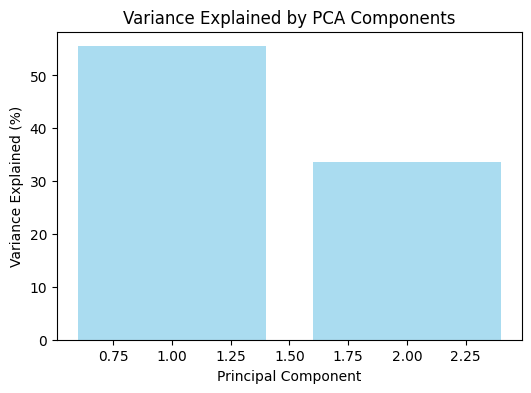

In [8]:
#Principal Component Analysis (PCA) is a dimensionality reduction technique.
#It projects high-dimensional data (here: GDP, life expectancy, population)
#into fewer dimensions (usually 2D) while preserving as much variance
#(information) as possible.

#- Original features = 3 (GDP, LifeExp, Population)
#- PCA compresses these into 2 components for visualization
#- The clusters in PCA space show how countries group together

#Important: PCA only helps visualize — clustering was done in full 3D space.


# Fit PCA on training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot explained variance
plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_*100, alpha=0.7, color="skyblue")
plt.ylabel("Variance Explained (%)")
plt.xlabel("Principal Component")
plt.title("Variance Explained by PCA Components")
plt.show()


Variance explained by PC1: 55.51%
Variance explained by PC2: 33.65%
Total variance preserved (2 PCs): 89.16%


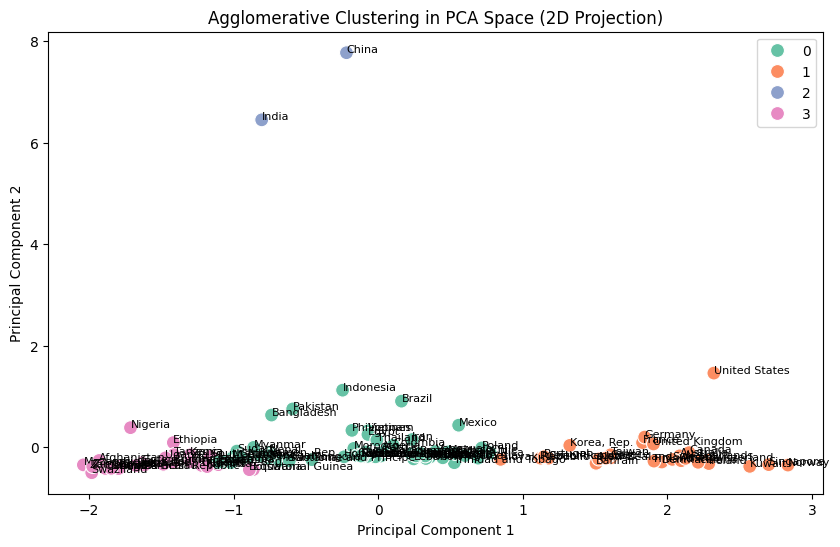

In [9]:
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total variance preserved (2 PCs): {sum(pca.explained_variance_ratio_[:2])*100:.2f}%")

# 2D scatter plot of clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1],
                hue=clusters_train, palette="Set2", s=100)
for i, txt in enumerate(countries_train):
    plt.annotate(txt, (X_train_pca[i,0], X_train_pca[i,1]), fontsize=8)
plt.title("Agglomerative Clustering in PCA Space (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Cluster Profiles


Cluster Profiles (mean values):
            gdpPercap    lifeExp           pop
Cluster                                       
0         6169.345722  69.900411  3.394871e+07
1        32757.381196  79.219259  2.784532e+07
2         3705.662630  68.829500  1.214540e+09
3         2663.223623  48.929357  1.980533e+07


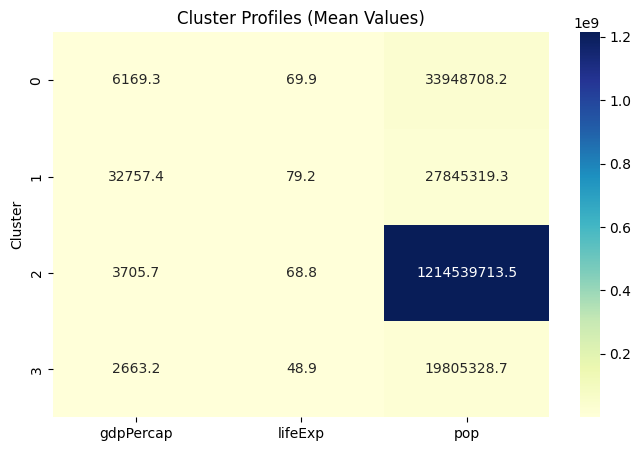

In [10]:
# Finally, we summarize clusters to interpret them.
# For each cluster, we compute the mean GDP, life expectancy, and population.
# This helps understand the socio-economic grouping.

cluster_summary = train_results.groupby("Cluster")[['gdpPercap','lifeExp','pop']].mean()
print("\nCluster Profiles (mean values):")
print(cluster_summary)

# Optional heatmap for better visualization
plt.figure(figsize=(8,5))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Cluster Profiles (Mean Values)")
plt.show()

We grouped countries into 4 clusters based on GDP per capita, life expectancy,
and population (2007, Gapminder data):

1. Cluster 0 → Middle-income countries
   - GDP ~6,000
   - Life expectancy ~70 years
   - Moderate population (~34M)
   - Examples: Emerging economies with decent development.

2. Cluster 1 → Wealthy developed countries
   - Very high GDP (~32,000)
   - Highest life expectancy (~79 years)
   - Moderate population (~27M)
   - Examples: Western Europe, North America, rich Asian nations.

3. Cluster 2 → Large-population developing countries
   - Lower GDP (~3,700)
   - Life expectancy ~69 years
   - Extremely high population (~1.2B)
   - Examples: Countries like China and India dominate this group.

4. Cluster 3 → Low-income countries
   - Lowest GDP (~2,600)
   - Lowest life expectancy (~49 years)
   - Population small to medium (~19M)
   - Examples: Many Sub-Saharan African nations.

 These clusters reflect global socio-economic divides:
   - Rich vs poor nations
   - Healthier vs struggling health systems
   - Small/moderate population vs very high population countries.

This shows how hierarchical clustering can reveal meaningful
patterns in real-world socio-economic data without any labels.